Here I will just quickly compare calls made previously (and used so far) with calls from this pipeline.
The main difference between previously and now is that I am using bcftools exclusively (and with a higher version) rather than intersecting results with Strelka2. I am also filtering a little bit differently and have more loci in the end. Let's see what that means!

In [1]:
# set important data in the config file first!
source("config.R")
source("../../extra-R-functions.R")
library(naturalsort)

v Reading from Status of mouse sequencing.

v Range ''All founder files''.

v Reading from Status of mouse sequencing.

v Range ''All Fx files''.


Attaching package: 'tidytable'


The following objects are masked from 'package:stats':

    dt, filter, lag


The following object is masked from 'package:base':

    %in%




In [2]:
# I had the vcf still present in the following path, but maybe this will change in the future. I have copied it also
# to here on Engram: REDACTED

old_vcf="REDACTED"

if(!file.exists(old_vcf)){
    stop("Did you make sure the old_vcf exists?")
}

In [3]:
for(s in paste0("SM_SW_",1:12)){
    cmd=paste0("cd ",folder_for_sequences," && picard GenotypeConcordance TRUTH_VCF=",old_vcf," CALL_VCF=",folder_for_sequences,"Founders.filtered.var.vcf.gz ",
               "CALL_SAMPLE=",s," TRUTH_SAMPLE=",s," O=conc_",s,".vcf")
    execute_cmd_sbatch(cmd, jobname="Concordance", env=env_mapping_etc,cpu="1", activateEnvScript=paste0(Barn_Mice_dir,"activateEnv.sh"),
                        time="short", mem="8G", acc=slurm_acc)
    Sys.sleep(1)
}
while(slurm_check_jobs_still_running(columbia_username,"Concordance")){
        Sys.sleep(60)
    }

[1] "sbatch -c 1 --mem=8G --job-name=Concordance -A ziab -t 11:59:00 --wrap '. ~/ColumbiaProjects/Barn_Mice/activateEnv.sh samtools-116; cd /moto/ziab/users/jr3950/data/genomes/tmp_founders/ && picard GenotypeConcordance TRUTH_VCF=/moto/ziab/users/jr3950/data/genomes/WhatsHap/whatshap_08_MM0_GQ0.concat.sorted.F0.GQ20.vcf.gz CALL_VCF=/moto/ziab/users/jr3950/data/genomes/tmp_founders/Founders.filtered.var.vcf.gz CALL_SAMPLE=SM_SW_1 TRUTH_SAMPLE=SM_SW_1 O=conc_SM_SW_1.vcf'"
[1] "Submitted batch job 13584215"
[1] "sbatch -c 1 --mem=8G --job-name=Concordance -A ziab -t 11:59:00 --wrap '. ~/ColumbiaProjects/Barn_Mice/activateEnv.sh samtools-116; cd /moto/ziab/users/jr3950/data/genomes/tmp_founders/ && picard GenotypeConcordance TRUTH_VCF=/moto/ziab/users/jr3950/data/genomes/WhatsHap/whatshap_08_MM0_GQ0.concat.sorted.F0.GQ20.vcf.gz CALL_VCF=/moto/ziab/users/jr3950/data/genomes/tmp_founders/Founders.filtered.var.vcf.gz CALL_SAMPLE=SM_SW_2 TRUTH_SAMPLE=SM_SW_2 O=conc_SM_SW_2.vcf'"
[1] "Submitte

In [4]:
conc_files=list.files(path = folder_for_sequences,pattern = "detail_metrics$",full.names = TRUE)
conc_files
conc_df=data.table()
for(f in conc_files){
    tmp<-fread(f, skip = 6)
    tmp$COUNT_REL=tmp$COUNT/sum(tmp$COUNT)
    tmp<-mutate(tmp, TRUTH_STATE=substr(TRUTH_STATE,1,3), CALL_STATE=substr(CALL_STATE,1,3))
    tmp<-group_by(tmp, TRUTH_SAMPLE,TRUTH_STATE, CALL_STATE)%>%summarise(COUNT=sum(COUNT),COUNT_REL=sum(COUNT_REL))
    conc_df=bind_rows(conc_df, tmp)
}
conc_df

[1] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_1.vcf.genotype_concordance_detail_metrics" 
 [2] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_10.vcf.genotype_concordance_detail_metrics"
 [3] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_11.vcf.genotype_concordance_detail_metrics"
 [4] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_12.vcf.genotype_concordance_detail_metrics"
 [5] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_2.vcf.genotype_concordance_detail_metrics" 
 [6] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_3.vcf.genotype_concordance_detail_metrics" 
 [7] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_4.vcf.genotype_concordance_detail_metrics" 
 [8] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_5.vcf.genotype_concordance_detail_metrics" 
 [9] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_6.vcf.genotype_concordance_detail_metrics" 
[10] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_7.vcf.genotype_concordance_detail_metrics" 
[11] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_8.vcf.genotype_concordance_detail_metrics" 
[12] "/moto/ziab/users/jr3950/data/genomes/tmp_founders//conc_SM_SW_9.vcf.genotype_concordance_detail_metrics"

TRUTH_SAMPLE,TRUTH_STATE,CALL_STATE,COUNT,COUNT_REL
<chr>,<chr>,<chr>,<int>,<dbl>
SM_SW_1,HET,HET,299493,2.204016e-01
SM_SW_1,HET,HOM,64,4.709861e-05
SM_SW_1,HET,MIS,297001,2.185677e-01
SM_SW_1,HOM,HET,45,3.311621e-05
SM_SW_1,HOM,HOM,278550,2.049894e-01
SM_SW_1,HOM,MIS,254060,1.869668e-01
SM_SW_1,MIS,HET,137075,1.008757e-01
SM_SW_1,MIS,HOM,92563,6.811858e-02
SM_SW_10,HET,HET,349316,2.403882e-01


Interpretation for below last time I ran it:

* Few terrible changes (HET -> HOM or HOM -> HET)

Looks good!

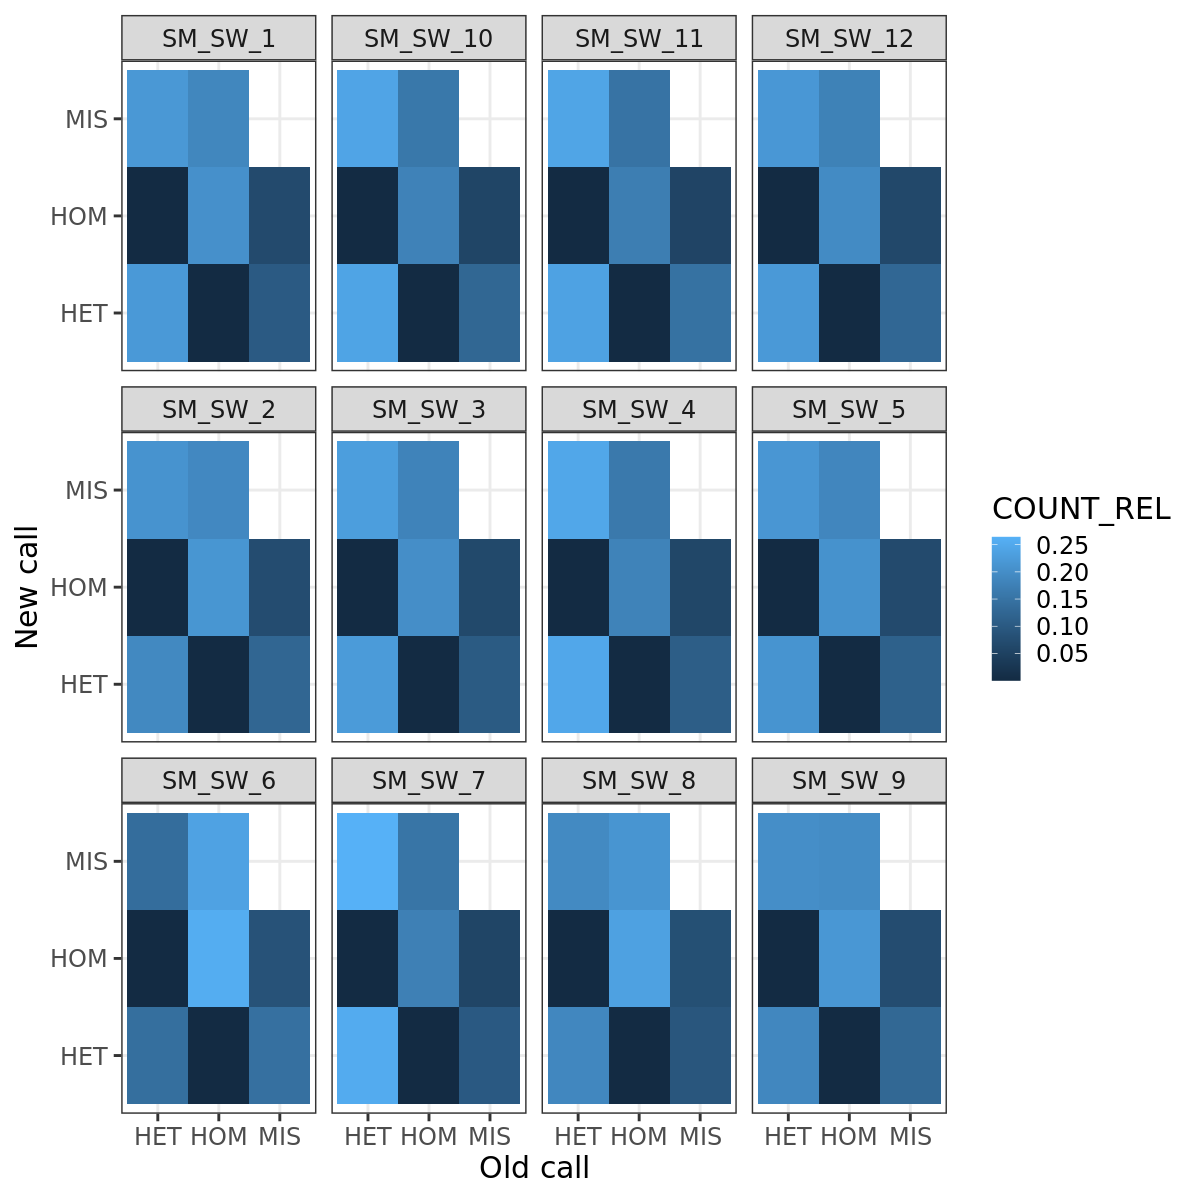

In [5]:
library(ggplot2)
ggplot(conc_df, aes(TRUTH_STATE,CALL_STATE,fill=COUNT_REL))+
geom_tile()+theme_bw(18)+facet_wrap(~TRUTH_SAMPLE)+xlab("Old call")+ylab("New call")